<a href="https://colab.research.google.com/github/RoshanChongder/Image_Processing_And_Face_Mask_Detection/blob/main/faceMaskDetectionConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Loading the Model and importing the required modules 

In [ ]:
# import the required libraries 
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2 , os , time , html 
import numpy as np
import PIL , io
from keras.preprocessing import image
from keras.models import model_from_json 

In [ ]:
model = model_from_json( open('drive/MyDrive/FaceMaskDetection/TrainedModel/July16_21/Model1/fer.json','r').read() )
model.load_weights( 'drive/MyDrive/FaceMaskDetection/TrainedModel/July16_21/Model1/fer.h5' )
print('The model is been loadded with weights')

The model is been loadded with weights


Supporting Methods

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img


def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png') # format bbox into png for return
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))  # format return string

  return bbox_bytes
  

Haar Cascade for face detection

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Method to take the patha of the image and predict if the face in image is wearing mask or not . 

In [ ]:

def predict( loc ):

  ''' This method receives a location of an image .
  Then it reads the image and then predicts if the face
  in the image is wearing mask or not ''' 


  # read the image from the drive location that is passed 
  img = cv2.imread( loc , cv2.IMREAD_COLOR )
  
  # convertion to grayscale 
  gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #print(gray_img.shape)

  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray_img)
  
  # create transparent overlay for bounding box
  bbox_array = np.zeros([480,640,4], dtype=np.uint8)
  
  predicted = []

  # draw face bounding box on image
  for (x,y,w,h) in faces:

      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # placing the rectangle around the face 
      cropped_gray = gray_img[y:y+w,x:x+h]  # cropping the face from the image 
      cropped_gray = cv2.resize(cropped_gray,(48,48)) # resizing the image 
      img_pixels = image.img_to_array(cropped_gray)  # getting the image pixeles into array 
      img_pixels = np.expand_dims(img_pixels, axis = 0) # expanding dim 
      img_pixels /= 255

      predictions = model.predict(img_pixels)  # predicting 
        #print( predictions )
        #find max indexed array
      index = np.argmax(predictions[0]) 
        
      emotions = ('with_mask' , 'without_mask') 
      predicted_emotion = emotions[index]  
      predicted.append( index  )
      #print( predicted_emotion )
      cv2.putText( img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
 
  return [ img , predicted ] 

Method to Traverse over the testing images and Call predict method for prediction

In [ ]:
# from where all the images will be read 
directory = 'drive/MyDrive/FaceMaskDetection/TestData'   

# d is for directory refference and tag  
# actual and pre will store actual emotion and predicted emotion 
d , actual , pre = { "with_mask" : 0 , "without_mask" : 1  } , [] , [] 

for dir in os.listdir(directory) : 
  tag = None 
  
  if dir in d :
    tag = d[dir]  # getting the tag correspondin to the dir  
  else :
    print( dir , " not found in " , d )
    break 

  subdir = os.path.join( directory, dir ) # selecting a certain sub-directory 
  print( "Processing the direcotry : " , subdir , "\n\n")

  for files in os.listdir(subdir) :
    try :
      name = os.path.join( subdir , files ) # name of the file 
      if os.path.isfile( name ):
        img , predicted = predict( name )  # calling take with image location in drive  
        if len(predicted) != 0 :
          print( "Actual " , tag , "Predicted value " , predicted )  # printing the predicted value
          actual.append(tag) # for debugging 
          pre.append(  tag if ( tag in predicted ) else predicted[0]  )
          print(actual[-1] , pre[-1]) # for debugging 
          cv2.imwrite( subdir + "/predicted/" + files , img  ) 
        else :
          print("Model not able to predict for " , name )
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))

print(actual , pre )
 

Processing the direcotry :  drive/MyDrive/FaceMaskDetection/TestData/without_mask 


Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [1]
1 1
Model not able to predict for  drive/MyDrive/FaceMaskDetection/TestData/without_mask/268.jpg
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [1, 0]
1 1
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [1]
1 1
Actual  1 Predicted value  [0]
1 0
Actual  1 Predicted value  [0, 0]
1 0
Actual  1 Predicted value  [1]
1 1
Actual  1 P

Plotting confusion Matrix

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt  
import itertools 
from sklearn.metrics import confusion_matrix

In [ ]:
c_matrix = confusion_matrix(y_true = actual , y_pred = pre )
def plot_confusion_matrix( cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[35  0]
 [33 36]]


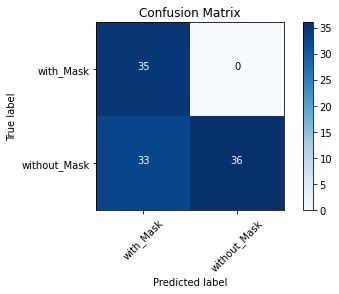

In [ ]:
plot_labels = ['with_Mask' , 'without_Mask']
plot_confusion_matrix( cm = c_matrix , classes = plot_labels , title='Confusion Matrix' )

Normalized Confusion Matrix 

Confusion matrix, without normalization
[[1.   0.  ]
 [0.48 0.52]]


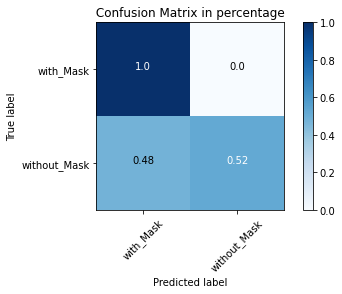

In [ ]:
# this can also be done using the sklearn library 
def percent_confusion_matrix( cm ) :
  pcm = []   # confusion matrix in percentage 
  for i in cm :
    total_images , temp = sum(i) , [] 
    for j in i :
      temp.append(round(j/total_images , 2 ) )
    pcm.append(temp)
  return pcm
plot_confusion_matrix( cm = np.array(percent_confusion_matrix(c_matrix)) , classes = plot_labels , title=' Confusion Matrix in percentage ' )

# nc_matrix = confusion_matrix( y_true = actual , y_pred = pre , normalize = 'true' )
# print(nc_matrix)

Computing Scores 

In [ ]:
from sklearn.metrics import classification_report 
print( classification_report( y_true = actual , y_pred = pre , target_names = plot_labels ) )

              precision    recall  f1-score   support

   with_Mask       0.51      1.00      0.68        35
without_Mask       1.00      0.52      0.69        69

    accuracy                           0.68       104
   macro avg       0.76      0.76      0.68       104
weighted avg       0.84      0.68      0.68       104

